In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [2]:
my_music = pd.read_csv("my_music.csv", index_col=False)

In [3]:
my_music.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
my_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5345 entries, 0 to 5344
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5345 non-null   float64
 1   energy            5345 non-null   float64
 2   key               5345 non-null   int64  
 3   loudness          5345 non-null   float64
 4   mode              5345 non-null   int64  
 5   speechiness       5345 non-null   float64
 6   acousticness      5345 non-null   float64
 7   instrumentalness  5345 non-null   float64
 8   liveness          5345 non-null   float64
 9   valence           5345 non-null   float64
 10  tempo             5345 non-null   float64
 11  type              5345 non-null   object 
 12  id                5345 non-null   object 
 13  uri               5345 non-null   object 
 14  track_href        5345 non-null   object 
 15  analysis_url      5345 non-null   object 
 16  duration_ms       5345 non-null   int64  


In [5]:
scaler = StandardScaler()
scaler.fit(my_music.select_dtypes(np.number))
my_music_scaled = scaler.transform(my_music.select_dtypes(np.number))
my_music_scaled_df = pd.DataFrame(my_music_scaled, columns = my_music.select_dtypes(np.number).columns)
display(my_music.head())
print()
display(my_music_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.701,0.425,7,-10.965,1,0.3750,0.32800,0.1300,0.1000,0.562,135.128,audio_features,2Fxmhks0bxGSBdJ92vM42m,spotify:track:2Fxmhks0bxGSBdJ92vM42m,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4
1,0.792,0.320,0,-16.387,0,0.3880,0.20400,0.9550,0.1060,0.590,135.000,audio_features,2ktuJSnA0K4YwRZOKYCWl6,spotify:track:2ktuJSnA0K4YwRZOKYCWl6,https://api.spotify.com/v1/tracks/2ktuJSnA0K4Y...,https://api.spotify.com/v1/audio-analysis/2ktu...,149454,4
2,0.612,0.797,1,-3.648,1,0.4480,0.06400,0.0000,0.2570,0.358,81.086,audio_features,3IaAYtmN8T0YIYVqnxNnVz,spotify:track:3IaAYtmN8T0YIYVqnxNnVz,https://api.spotify.com/v1/tracks/3IaAYtmN8T0Y...,https://api.spotify.com/v1/audio-analysis/3IaA...,434077,4
3,0.701,0.425,7,-10.965,1,0.3750,0.32800,0.1300,0.1000,0.562,135.128,audio_features,0ae2Bmei6kzUKjDVl7B7q8,spotify:track:0ae2Bmei6kzUKjDVl7B7q8,https://api.spotify.com/v1/tracks/0ae2Bmei6kzU...,https://api.spotify.com/v1/audio-analysis/0ae2...,194088,4
4,0.563,0.814,7,-4.219,0,0.0558,0.00983,0.0437,0.0732,0.796,140.615,audio_features,0iM1Ioz4N4p7MU1DKyqsov,spotify:track:0iM1Ioz4N4p7MU1DKyqsov,https://api.spotify.com/v1/tracks/0iM1Ioz4N4p7...,https://api.spotify.com/v1/audio-analysis/0iM1...,157832,4


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.271446,-1.621155,0.478043,-2.054928,0.902741,2.791380,0.852526,0.816759,-0.613200,0.200931,0.493517,-0.439770,0.078681
1,0.942401,-2.245501,-1.450573,-4.326818,-1.107738,2.924629,0.239620,7.356525,-0.571031,0.323941,0.488673,-1.472252,0.078681
2,-0.384763,0.590814,-1.175057,1.010993,0.902741,3.539622,-0.452370,-0.213750,0.490224,-0.695278,-1.551264,5.111698,0.078681
3,0.271446,-1.621155,0.478043,-2.054928,0.902741,2.791380,0.852526,0.816759,-0.613200,0.200931,0.493517,-0.439770,0.078681
4,-0.746047,0.691899,0.478043,0.771736,-1.107738,-0.480386,-0.720121,0.132660,-0.801555,1.228937,0.701128,-1.278451,0.078681


In [20]:
with open("scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)
with open("kmeans.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [21]:
my_music_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,5.345000e+03,5.345000e+03,5.345000e+03,5.345000e+03,5.345000e+03,5.345000e+03,5.345000e+03,5345.000000,5.345000e+03,5345.000000,5.345000e+03,5.345000e+03,5.345000e+03
mean,6.061880e-16,-4.892044e-16,-1.143249e-16,3.403161e-16,-4.054547e-17,-1.063488e-17,1.063488e-17,0.000000,-1.595232e-17,0.000000,6.859496e-16,2.658719e-16,8.348379e-16
std,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094,1.000094e+00,1.000094,1.000094e+00,1.000094e+00,1.000094e+00
min,-3.687928e+00,-3.879505e+00,-1.450573e+00,-7.186584e+00,-1.107738e+00,-8.196572e-01,-7.686205e-01,-0.213750,-1.180374e+00,-2.127456,-3.124863e+00,-4.345130e+00,-1.348749e+01
25%,-6.280767e-01,-6.340936e-01,-8.995399e-01,-4.308321e-01,-1.107738e+00,-6.433590e-01,-6.792440e-01,-0.213750,-6.455297e-01,-0.765569,-8.331203e-01,-5.531413e-01,7.868127e-02
50%,4.287869e-02,1.270142e-01,-7.299000e-02,1.650049e-01,9.027406e-01,-4.291363e-01,-4.182648e-01,-0.213750,-3.953266e-01,-0.009941,3.697667e-02,-2.834152e-02,7.868127e-02
75%,6.769684e-01,7.513604e-01,7.535599e-01,6.535744e-01,9.027406e-01,2.289069e-01,2.692771e-01,-0.212981,4.269701e-01,0.785225,6.006328e-01,5.038374e-01,7.868127e-02
max,2.343297e+00,1.797884e+00,1.580110e+00,2.612881e+00,9.027406e-01,8.059825e+00,4.109824e+00,7.610189,5.564568e+00,2.125146,3.358866e+00,6.636340e+00,4.600739e+00


In [22]:
my_music_scaled_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.271446,-1.621155,0.478043,-2.054928,0.902741,2.791380,0.852526,0.816759,-0.613200,0.200931,0.493517,-0.439770,0.078681
1,0.942401,-2.245501,-1.450573,-4.326818,-1.107738,2.924629,0.239620,7.356525,-0.571031,0.323941,0.488673,-1.472252,0.078681
2,-0.384763,0.590814,-1.175057,1.010993,0.902741,3.539622,-0.452370,-0.213750,0.490224,-0.695278,-1.551264,5.111698,0.078681
3,0.271446,-1.621155,0.478043,-2.054928,0.902741,2.791380,0.852526,0.816759,-0.613200,0.200931,0.493517,-0.439770,0.078681
4,-0.746047,0.691899,0.478043,0.771736,-1.107738,-0.480386,-0.720121,0.132660,-0.801555,1.228937,0.701128,-1.278451,0.078681
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5340,-0.406883,-0.110832,-1.450573,0.635138,0.902741,-0.732533,0.432389,-0.213750,0.082589,-0.128557,-0.001920,0.066177,0.078681
5341,-1.638196,-0.509224,-0.899540,-0.486561,0.902741,0.095658,2.117880,-0.213705,1.284408,-1.486051,2.226030,0.055698,0.078681
5342,1.716581,-1.942248,-1.175057,0.436525,0.902741,2.719631,-0.321880,-0.213750,0.968140,-0.330644,-1.554216,-1.320713,0.078681
5343,2.210581,-1.781701,1.580110,-1.223605,-1.107738,-0.237463,-0.761245,-0.213437,-0.606172,0.205325,-0.645979,-0.802552,0.078681


In [23]:
pd.DataFrame(my_music_scaled_df).corr()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,1.000000,-0.024998,-0.010888,0.006974,-0.032260,0.181852,-0.128626,0.010856,-0.080457,0.370700,-0.133611,-0.195584,0.074968
energy,-0.024998,1.000000,0.008173,0.689873,-0.035053,-0.081781,-0.532482,0.062447,0.169548,0.348986,0.138314,0.061413,0.075688
key,-0.010888,0.008173,1.000000,-0.000907,-0.156403,0.013801,-0.002175,0.005912,0.023094,0.015716,0.010649,-0.000343,-0.001250
loudness,0.006974,0.689873,-0.000907,1.000000,-0.017239,-0.107616,-0.418666,-0.075835,0.101242,0.199138,0.059997,0.029913,0.041571
mode,-0.032260,-0.035053,-0.156403,-0.017239,1.000000,-0.000675,0.034475,-0.024314,-0.026852,-0.035253,0.009980,-0.012230,-0.025104
speechiness,0.181852,-0.081781,0.013801,-0.107616,-0.000675,1.000000,0.021387,-0.049340,0.064474,0.024263,0.101024,-0.129592,0.022606
acousticness,-0.128626,-0.532482,-0.002175,-0.418666,0.034475,0.021387,1.000000,-0.004842,-0.103076,-0.152924,-0.123588,-0.056427,-0.084056
instrumentalness,0.010856,0.062447,0.005912,-0.075835,-0.024314,-0.049340,-0.004842,1.000000,0.000666,-0.045735,0.048632,-0.005899,-0.032327
liveness,-0.080457,0.169548,0.023094,0.101242,-0.026852,0.064474,-0.103076,0.000666,1.000000,0.032666,0.021837,0.026011,0.022569
valence,0.370700,0.348986,0.015716,0.199138,-0.035253,0.024263,-0.152924,-0.045735,0.032666,1.000000,0.028225,-0.115122,0.053811


In [24]:
# loudness x energy has highest correlation 0.69

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



([<matplotlib.axis.XTick at 0x7f9754665520>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

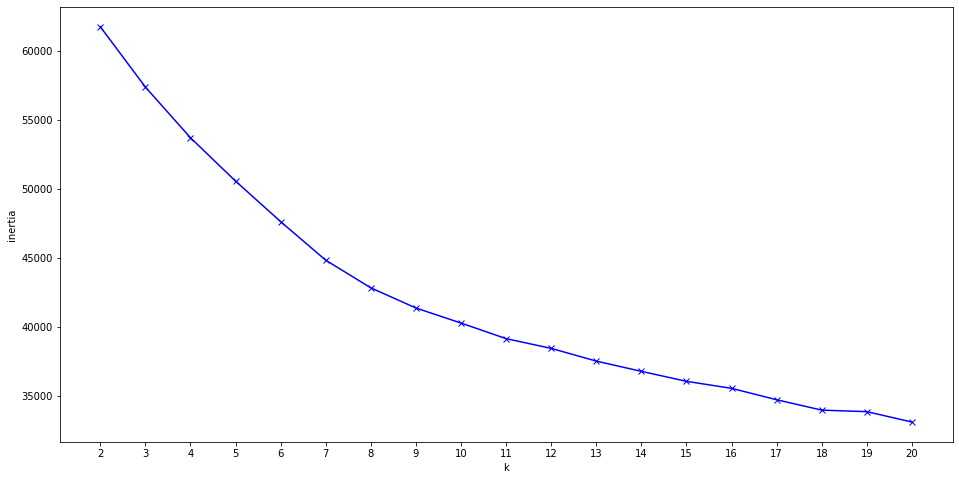

In [25]:
#elbow method
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(my_music_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))

In [26]:
kmeans = KMeans(n_clusters=9, random_state=1234)
kmeans.fit(my_music_scaled_df)

KMeans(n_clusters=9, random_state=1234)

In [27]:
kmeans.labels_


array([0, 8, 1, ..., 0, 6, 6], dtype=int32)

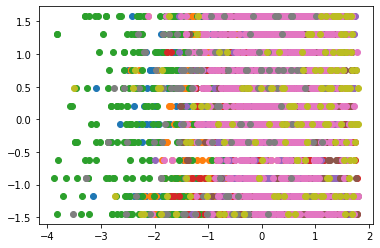

In [34]:
# assign a cluster to each example
labels = kmeans.predict(my_music_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(my_music_scaled_df.to_numpy()[row_ix, 1], my_music_scaled_df.to_numpy()[row_ix, 2])
    # show the plot
pyplot.show()

In [35]:
clusters = kmeans.predict(my_music_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     495
1     790
2     328
3    1156
4     686
5     384
6    1231
7     125
8     150
dtype: int64

In [36]:
kmeans.inertia_

41373.8244566871

In [37]:
my_music["cluster"] = clusters
my_music

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,0.701,0.425,7,-10.965,1,0.3750,0.32800,0.130000,0.1000,0.562,135.128,audio_features,2Fxmhks0bxGSBdJ92vM42m,spotify:track:2Fxmhks0bxGSBdJ92vM42m,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4,0
1,0.792,0.320,0,-16.387,0,0.3880,0.20400,0.955000,0.1060,0.590,135.000,audio_features,2ktuJSnA0K4YwRZOKYCWl6,spotify:track:2ktuJSnA0K4YwRZOKYCWl6,https://api.spotify.com/v1/tracks/2ktuJSnA0K4Y...,https://api.spotify.com/v1/audio-analysis/2ktu...,149454,4,8
2,0.612,0.797,1,-3.648,1,0.4480,0.06400,0.000000,0.2570,0.358,81.086,audio_features,3IaAYtmN8T0YIYVqnxNnVz,spotify:track:3IaAYtmN8T0YIYVqnxNnVz,https://api.spotify.com/v1/tracks/3IaAYtmN8T0Y...,https://api.spotify.com/v1/audio-analysis/3IaA...,434077,4,1
3,0.701,0.425,7,-10.965,1,0.3750,0.32800,0.130000,0.1000,0.562,135.128,audio_features,0ae2Bmei6kzUKjDVl7B7q8,spotify:track:0ae2Bmei6kzUKjDVl7B7q8,https://api.spotify.com/v1/tracks/0ae2Bmei6kzU...,https://api.spotify.com/v1/audio-analysis/0ae2...,194088,4,0
4,0.563,0.814,7,-4.219,0,0.0558,0.00983,0.043700,0.0732,0.796,140.615,audio_features,0iM1Ioz4N4p7MU1DKyqsov,spotify:track:0iM1Ioz4N4p7MU1DKyqsov,https://api.spotify.com/v1/tracks/0iM1Ioz4N4p7...,https://api.spotify.com/v1/audio-analysis/0iM1...,157832,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5340,0.609,0.679,0,-4.545,1,0.0312,0.24300,0.000000,0.1990,0.487,122.034,audio_features,4Zcz6saEkOII3PlXd9gN3o,spotify:track:4Zcz6saEkOII3PlXd9gN3o,https://api.spotify.com/v1/tracks/4Zcz6saEkOII...,https://api.spotify.com/v1/audio-analysis/4Zcz...,215960,4,3
5341,0.442,0.612,2,-7.222,1,0.1120,0.58400,0.000006,0.3700,0.178,180.917,audio_features,6HU7h9RYOaPRFeh0R3UeAr,spotify:track:6HU7h9RYOaPRFeh0R3UeAr,https://api.spotify.com/v1/tracks/6HU7h9RYOaPR...,https://api.spotify.com/v1/audio-analysis/6HU7...,215507,4,4
5342,0.897,0.371,1,-5.019,1,0.3680,0.09040,0.000000,0.3250,0.441,81.008,audio_features,5yorXJWdBan1Vlh116ZtQ7,spotify:track:5yorXJWdBan1Vlh116ZtQ7,https://api.spotify.com/v1/tracks/5yorXJWdBan1...,https://api.spotify.com/v1/audio-analysis/5yor...,156005,4,0
5343,0.964,0.398,11,-8.981,0,0.0795,0.00151,0.000039,0.1010,0.563,105.012,audio_features,11ZulcYY4lowvcQm4oe3VJ,spotify:track:11ZulcYY4lowvcQm4oe3VJ,https://api.spotify.com/v1/tracks/11ZulcYY4low...,https://api.spotify.com/v1/audio-analysis/11Zu...,178405,4,6


In [38]:
my_music[my_music['cluster'] == 2].sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
1256,0.522,0.385,0,-7.355,1,0.0288,0.536,0.0,0.135,0.236,89.792,audio_features,2RttW7RAu5nOAfq6YFvApB,spotify:track:2RttW7RAu5nOAfq6YFvApB,https://api.spotify.com/v1/tracks/2RttW7RAu5nO...,https://api.spotify.com/v1/audio-analysis/2Rtt...,207520,4,2


In [39]:
my_music.to_csv("my_music_clustered.csv")